<a href="https://colab.research.google.com/github/earo12/Credit-Card-Clustering/blob/main/Credit_Card_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Credit Card Clustering

This project has the purpose of the implementation of the Plotly library.
Here I found a datasaet with the following features:



CUST_ID	

BALANCE	

BALANCE_FREQUENCY	

PURCHASES	

ONEOFF_PURCHASES	

INSTALLMENTS_PURCHASES	

CASH_ADVANCE	

PURCHASES_FREQUENCY	

ONEOFF_PURCHASES_FREQUENCY	

PURCHASES_INSTALLMENTS_FREQUENCY	

CASH_ADVANCE_FREQUENCY	

CASH_ADVANCE_TRX	

PURCHASES_TRX	

CREDIT_LIMIT	

PAYMENTS	

MINIMUM_PAYMENTS	

PRC_FULL_PAYMENT	

TENURE




First we have to load all the libraries we're going to use:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as po
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

Now let's take a look to the dataframe:

In [ ]:
df = pd.read_csv('data')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


We can take a look more specifically what contains this dataset:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Now we're going to take a look at null values:

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

I'll check closer those features in order to see whether they have something usefull:

In [ ]:
df['MINIMUM_PAYMENTS'].value_counts()

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

In [ ]:
df['CREDIT_LIMIT'].value_counts()

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

Since they only have some numerical values, we can replace the null values with zero in order to don't lose data later:

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(0,inplace = True)

In [ ]:
df['CREDIT_LIMIT'].fillna(0,inplace = True)

Now we can check correlation between each category:

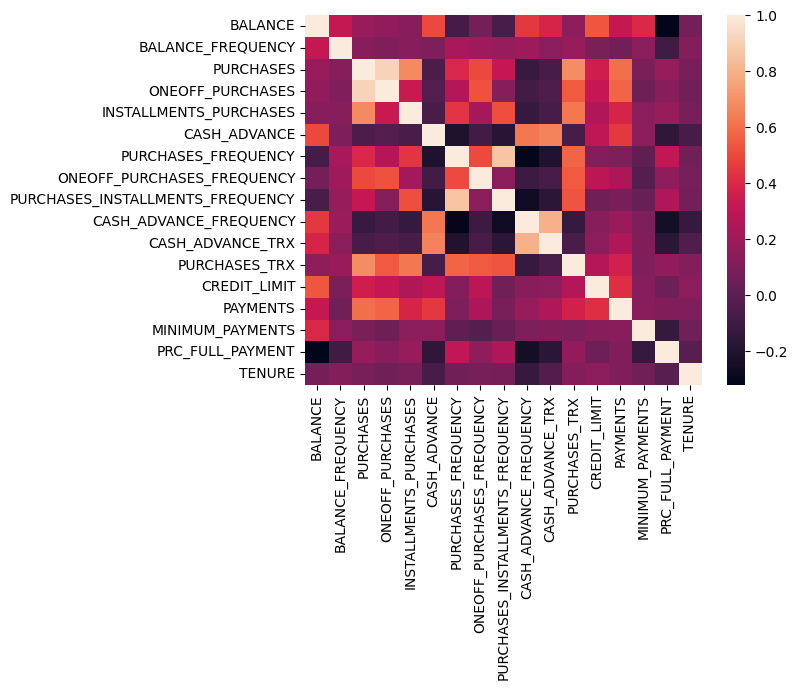

In [ ]:
sns.heatmap(data = df.corr(), annot = False)
plt.show()

From here we can define one variable called c_data which is going to help us with the model after:

In [ ]:
c_data = df[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']]
for j in c_data.columns:
  MinMaxScaler(j)

We've already loaded KMeans package from Sklearn library, so we can use it in order to create clusters:

In [ ]:
kmeans = KMeans(n_clusters = 5)
clusters = kmeans.fit_predict(c_data)
df['CREDIT_CARD_SEGMENTS'] = clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['CREDIT_CARD_SEGMENTS']

0       0
1       4
2       4
3       4
4       0
       ..
8945    0
8946    0
8947    0
8948    0
8949    0
Name: CREDIT_CARD_SEGMENTS, Length: 8950, dtype: int32

In [ ]:
df['CREDIT_CARD_SEGMENTS'] = df['CREDIT_CARD_SEGMENTS'].map({0 : 'Cluster 2', 2 : 'Cluster 3', 3 : 'Cluster 4', 4 : 'Cluster 5'})
df['CREDIT_CARD_SEGMENTS'].head()

0    Cluster 2
1    Cluster 5
2    Cluster 5
3    Cluster 5
4    Cluster 2
Name: CREDIT_CARD_SEGMENTS, dtype: object

In [ ]:
pl = po.Figure()
for j in list(df['CREDIT_CARD_SEGMENTS'].unique()):
    pl.add_trace(po.Scatter3d(x = df[df["CREDIT_CARD_SEGMENTS"]== j]['BALANCE'],
                                y = df[df["CREDIT_CARD_SEGMENTS"] == j]['PURCHASES'],
                                z = df[df["CREDIT_CARD_SEGMENTS"] == j]['CREDIT_LIMIT'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(j)))
pl.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES %{y} <br>DCREDIT_LIMIT: %{z}')

    
pl.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BALANCE', titlefont_color = 'black'),
                                yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                                zaxis = dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                 font = dict(family = 'Gilroy', color = 'black', size = 12))

pl.show()